Importing Libraries

In [ ]:
import numpy as np                                     #useful for making some numpy arrays 
import pandas as pd                                    #useful for making dataframe(structured table)
import matplotlib.pyplot as plt                        #useful for making plots and graphs
import seaborn as sns                                  #useful for making plots and graphs
from sklearn.model_selection import train_test_split   #use to train the data model
from sklearn.ensemble import RandomForestRegressor     #uses algorithm for prediction
from sklearn import metrics                            #useful for finding the performance of model such as accuracy score , error score

Data Collection and Processing

In [ ]:
# Loading the csv data to a Pandas Dataframe
gold_data = pd.read_csv('gld_price_data.csv')

In [ ]:
# Print first 5 rows in the dataframe
gold_data.head()
 # In the given gold dataset we have ; Date , SPX(aka S&P index) is a stock exchange , GLD(aka gold) , USO(United States Oil), SLV(silver), and a pair of EUR/USD(European currency per United States Dollars)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
# Print the last 5 rows of the dataframe 
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [ ]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [ ]:
#Getting some basic information about the data
gold_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
# Checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [ ]:
# Getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
gold_data.GLD  #It is one of the way to show "GLD" column using '.'

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [ ]:
gold_data['GLD'] #listing "GLD" column using 2nd way

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [ ]:
gold_data[gold_data['GLD']>100]  # printing gold values above 100

,Date,SPX,GLD,USO,SLV,EUR/USD
375,10/6/2009,1054.719971,102.279999,36.540001,17.0800,1.471151
376,10/7/2009,1057.579956,102.360001,35.959999,17.2500,1.478131
377,10/8/2009,1065.479980,103.639999,36.680000,17.5200,1.473405
378,10/12/2009,1076.189941,103.559998,37.689999,17.4800,1.484605
379,10/13/2009,1073.189941,104.260002,38.150002,17.4800,1.493206
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [ ]:
gold_data[['GLD','SLV']]  # listing dataset's "GLD" & "SLV" columns

,GLD,SLV
0,84.860001,15.1800
1,85.570000,15.2850
2,85.129997,15.1670
3,84.769997,15.0530
4,86.779999,15.5900
...,...,...
2285,124.589996,15.5100
2286,124.330002,15.5300
2287,125.180000,15.7400
2288,124.489998,15.5600


In [ ]:
gold_data.loc[100:1000:100,"SPX":"EUR/USD"]  #Printing gold values from 100th index to 1000th index with a difference of 100 and from column "SPX TO EUR/USD"

,SPX,GLD,USO,SLV,EUR/USD
100,1339.869995,85.599998,111.269997,16.350000,1.536901
200,885.280029,83.870003,32.730000,10.840000,1.429307
300,910.330017,93.760002,34.110001,14.420000,1.383394
400,1093.479980,109.739998,39.119999,17.150000,1.490891
500,1197.300049,112.690002,40.889999,17.840000,1.365598
600,1165.319946,132.289993,35.599998,22.780001,1.388021
700,1320.020020,139.410004,42.049999,35.270000,1.389796
800,1212.920044,179.100006,34.439999,40.400002,1.443314
900,1344.329956,167.179993,37.330002,32.680000,1.312715
1000,1350.520020,153.029999,33.000000,26.209999,1.212415


Correlation:
1. Positive Correlation --> both the variable will simutaneously change(directly proportional)
2. Negative Correlation --> if 1 increase other will decrease(inversely proportional)


In [ ]:
correlation = gold_data.corr() # this pandas corr() fn gives the correlation of elements of the dataset

In [ ]:
# Correlation values of elements with each other
print(correlation)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

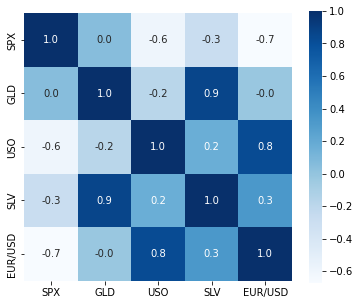

In [ ]:
# Constructing a heat map to understand the correlation
plt.figure(figsize = (6,5))
sns.heatmap(correlation, cbar = True, square = True,  fmt = '.1f', annot = True, annot_kws={'size':10},cmap = 'Blues')

In [ ]:
# Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Count'>

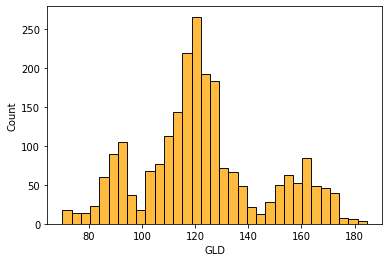

In [ ]:
# check the distribution of the GLD price
sns.histplot(gold_data['GLD'], color = 'orange')

Splitting the Features and Target:


* Features --> SPX, USO, SLV, EUR/USD
   
* Target --> GLD


In [ ]:
X = gold_data.drop(['Date','GLD'],axis=1)  # Here we removed 'Date' and 'GLD' column using drop() fn 
Y = gold_data['GLD']                       # Also we created a 'Y' object to store 'GLD'

In [ ]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(Y) # Printed all the GLD values

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and test data:


* X_train - 80% values of SPX, USO, SLV, EU/USD
* X_test - 20% values of SPX, USO, SLV, EU/USD
* Y_train - 80% values of GLD
* Y_test - 20% values of GLD



In [ ]:
X_train , X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

**Model Training: Random Forest Regressor**

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
 # Training the model
regressor.fit(X_train,Y_train)  #fit() fn fit the data of X & Y in regressor model

RandomForestRegressor()

**Model Evaluation**

In [ ]:
# Prediction on test Data
test_data_prediction = regressor.predict(X_test)

In [ ]:
print(test_data_prediction)

[168.53439971  81.8986999  115.77049968 127.57520091 120.66680143
 154.76199746 150.09329861 126.18290015 117.46769869 125.89680077
 116.50230105 172.01230086 141.61469887 168.14929886 115.20160018
 117.69190082 137.92950254 169.96830085 158.99760253 158.27059957
 155.14720025 125.33820015 175.73199976 156.51400409 125.18950042
  93.98030004  77.08650018 120.72899981 119.08569969 167.49509948
  88.20210032 125.15820008  90.94930045 117.74209985 121.01119931
 136.78790043 115.61660132 114.95850096 147.77549992 107.21220106
 104.01010226  87.26529816 126.38630039 118.11249973 153.06849872
 119.59789998 108.36149991 108.04979815  93.20380029 127.09369758
  74.70770029 113.69659914 121.32150014 111.28809913 118.89499887
 120.67009948 158.94569944 168.56930117 147.29409745  85.60039828
  94.28240046  86.73769842  90.618      118.9990008  126.50540092
 127.4936     168.7468992  122.29839939 117.20379895  98.91870019
 168.34210132 142.91589849 131.61410222 121.36110213 121.07029951
 119.78590

In [ ]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error:" , error_score)

R squared error: 0.9891796601082028


**Compare the Actual Values and Predicted Values in a Plot**

In [ ]:
Y_test = list(Y_test) #Here we converted Y_test to list as previously Y_test was pandas series dataframe so to prevent from error we convert it

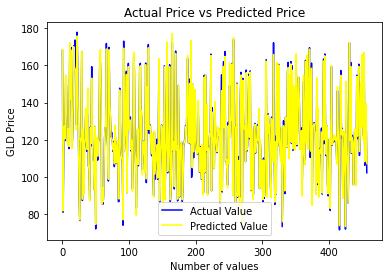

In [ ]:
plt.plot(Y_test, color='blue', label = 'Actual Value')  
plt.plot(test_data_prediction, color='yellow', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()    # use to show the box(defining actual value with blue & predicted value with yellow) 
plt.show()